In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


df = pd.read_csv(r"C:\Users\sania\OneDrive\Documents\Alex Data Analysis\Movie correlation project\movies.csv")

In [25]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-1986,96,6.8,Molly Ringwald,John Hughes,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,13-07-2016,127,7.0,Bryan Cranston,Ellen Sue Brown,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,22-01-2016,102,6.0,Robert De Niro,John Phillips,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,23-09-2016,87,6.8,Andy Samberg,Nicholas Stoller,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,17-06-2016,107,6.3,Dwayne Johnson,Ike Barinholtz,2016


In [27]:
# Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
writer - 0%
year - 0%


In [29]:
print(df.dtypes)

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object


In [31]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [33]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-1986,96,6.8,Molly Ringwald,John Hughes,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,13-07-2016,127,7.0,Bryan Cranston,Ellen Sue Brown,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,22-01-2016,102,6.0,Robert De Niro,John Phillips,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,23-09-2016,87,6.8,Andy Samberg,Nicholas Stoller,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,17-06-2016,107,6.3,Dwayne Johnson,Ike Barinholtz,2016


In [35]:
# released year and released date don't match 

df['yearcorrect'] = df['released'].astype(str).str[:4]

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,Stephen King,1986,22-0
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,Jim Cash,1986,16-0
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,James Cameron,1986,18-0
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,John Hughes,1986,11-0
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-1986,96,6.8,Molly Ringwald,John Hughes,1986,28-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,13-07-2016,127,7.0,Bryan Cranston,Ellen Sue Brown,2016,13-0
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,22-01-2016,102,6.0,Robert De Niro,John Phillips,2016,22-0
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,23-09-2016,87,6.8,Andy Samberg,Nicholas Stoller,2016,23-0
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,17-06-2016,107,6.3,Dwayne Johnson,Ike Barinholtz,2016,17-0


In [55]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [43]:
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,Stephen King,1986,22-0
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,Jim Cash,1986,16-0
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,James Cameron,1986,18-0
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,John Hughes,1986,11-0
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-1986,96,6.8,Molly Ringwald,John Hughes,1986,28-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,13-07-2016,127,7.0,Bryan Cranston,Ellen Sue Brown,2016,13-0
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,22-01-2016,102,6.0,Robert De Niro,John Phillips,2016,22-0
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,23-09-2016,87,6.8,Andy Samberg,Nicholas Stoller,2016,23-0
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,17-06-2016,107,6.3,Dwayne Johnson,Ike Barinholtz,2016,17-0


In [49]:
pd.set_option('display.max_rows', None)

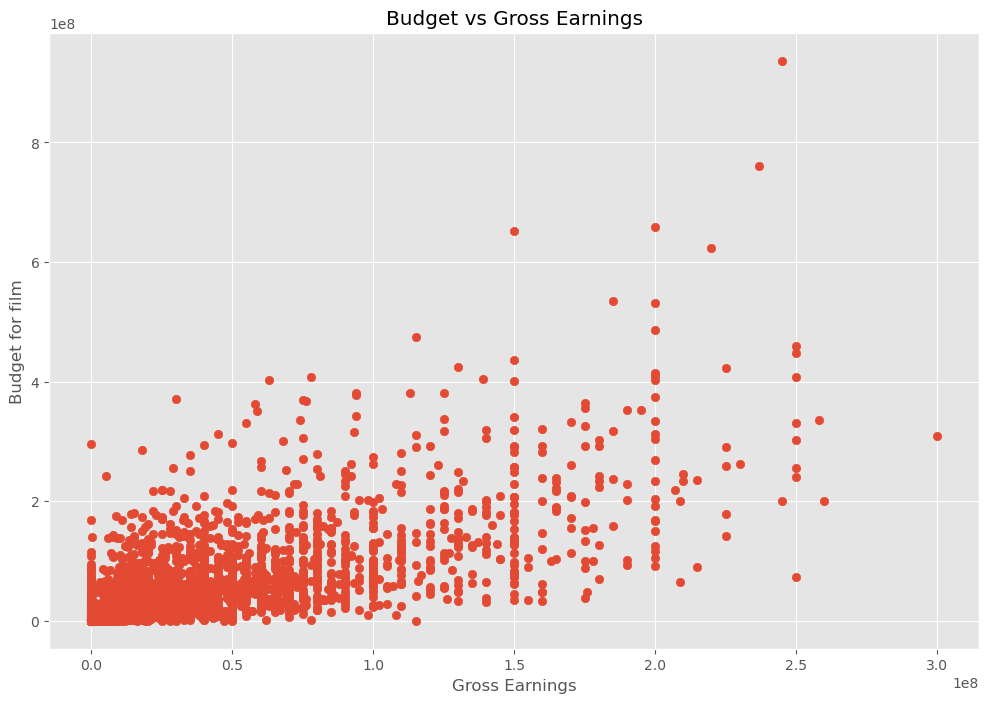

In [61]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')
plt.show()


In [59]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,18-12-2015,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,18-1
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,18-12-2009,162,7.8,Sam Worthington,James Cameron,2009,18-1
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,19-12-1997,194,7.8,Leonardo DiCaprio,James Cameron,1997,19-1
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,12-06-2015,124,7.0,Chris Pratt,Rick Jaffa,2015,12-0
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,04-05-2012,143,8.1,Robert Downey Jr.,Joss Whedon,2012,04-0


In [69]:
# Plot budget vs gross using seaborn

sns.regplot(x="gross", y="budget", data=df,scatter_kws ={"color":"red"})

<Axes: xlabel='gross', ylabel='budget'>

In [75]:
#correlation

df.corr(method = 'pearson',numeric_only=True)


,budget,gross,runtime,score,year
budget,1.000000,0.682588,0.309652,0.019061,0.374904
gross,0.682588,1.000000,0.238183,0.171825,0.246975
runtime,0.309652,0.238183,1.000000,0.386864,0.127864
score,0.019061,0.171825,0.386864,1.000000,0.109251
year,0.374904,0.246975,0.127864,0.109251,1.000000


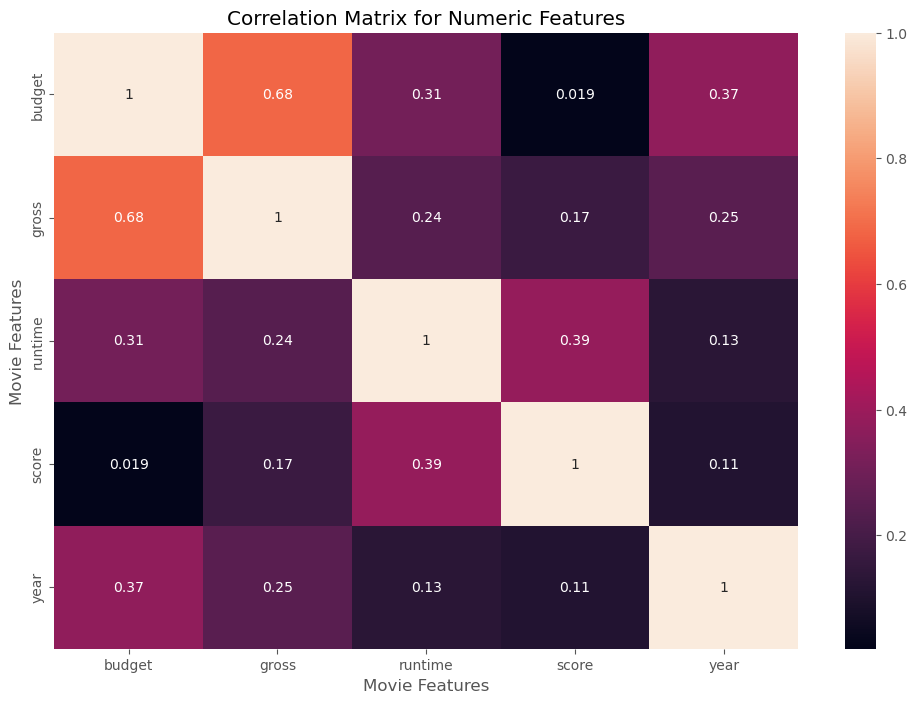

In [79]:
correlation_matrix = df.corr(method = 'pearson',numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [81]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,574,37,468,0,936662225,2146,5,997,136,8.1,236,1106,2015,35
2302,237000000,837,36,478,0,760507625,219,5,996,162,7.8,986,768,2009,35
1100,200000000,837,37,478,6,658672302,2852,5,1047,194,7.8,699,768,1997,37
2916,150000000,846,37,207,0,652270625,1246,5,623,124,7.0,203,1545,2015,22
2603,220000000,596,37,656,0,623357910,2276,5,178,143,8.1,946,1010,2012,6
2200,185000000,869,37,200,0,534858444,2366,5,971,152,9.0,205,986,2008,34
3011,200000000,574,37,366,0,532177324,1900,5,883,133,7.9,371,272,2016,31
3088,200000000,686,37,55,2,486295561,834,4,909,97,7.4,342,97,2016,32
1310,115000000,574,37,392,0,474544677,2143,4,1015,136,6.5,368,629,1999,36
2920,250000000,596,37,656,0,459005868,220,5,18,141,7.4,946,1010,2015,0


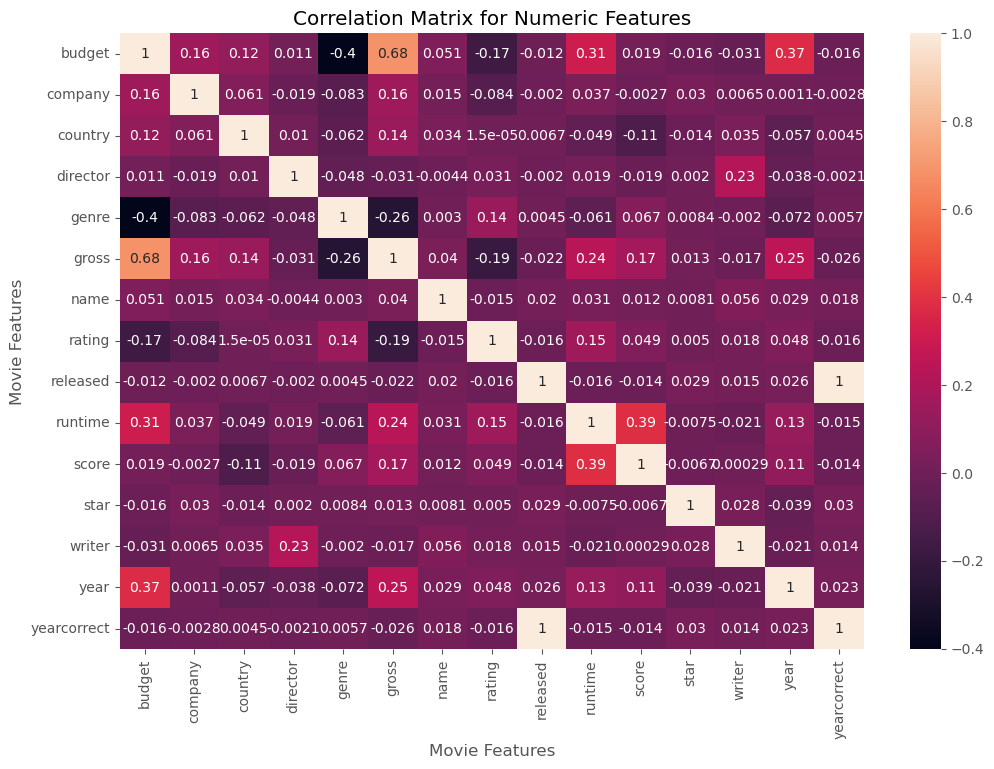

In [83]:
correlation_matrix = df_numerized.corr(method = 'pearson',numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [85]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
budget,1.000000,0.157083,0.118863,0.011052,-0.401052,0.682588,0.051049,-0.171070,-0.012195,0.309652,0.019061,-0.016357,-0.031269,0.374904,-0.015688
company,0.157083,1.000000,0.061089,-0.018730,-0.083068,0.156013,0.014947,-0.083646,-0.002015,0.037491,-0.002730,0.030054,0.006527,0.001121,-0.002811
country,0.118863,0.061089,1.000000,0.010291,-0.062478,0.138064,0.034133,0.000015,0.006652,-0.049398,-0.113568,-0.014146,0.035367,-0.057044,0.004539
director,0.011052,-0.018730,0.010291,1.000000,-0.048337,-0.031221,-0.004434,0.030589,-0.002037,0.018846,-0.018591,0.001973,0.227905,-0.037946,-0.002064
genre,-0.401052,-0.083068,-0.062478,-0.048337,1.000000,-0.263051,0.002989,0.136055,0.004501,-0.061327,0.067234,0.008380,-0.001986,-0.072299,0.005670
gross,0.682588,0.156013,0.138064,-0.031221,-0.263051,1.000000,0.039578,-0.191666,-0.021879,0.238183,0.171825,0.013428,-0.017184,0.246975,-0.025895
name,0.051049,0.014947,0.034133,-0.004434,0.002989,0.039578,1.000000,-0.014934,0.020033,0.031283,0.011649,0.008144,0.055729,0.028571,0.018108
rating,-0.171070,-0.083646,0.000015,0.030589,0.136055,-0.191666,-0.014934,1.000000,-0.015758,0.153396,0.048781,0.004985,0.017506,0.048356,-0.015889
released,-0.012195,-0.002015,0.006652,-0.002037,0.004501,-0.021879,0.020033,-0.015758,1.000000,-0.015753,-0.014246,0.028721,0.014980,0.025509,0.998454
runtime,0.309652,0.037491,-0.049398,0.018846,-0.061327,0.238183,0.031283,0.153396,-0.015753,1.000000,0.386864,-0.007494,-0.020986,0.127864,-0.015029


In [87]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget       budget         1.000000
             company        0.157083
             country        0.118863
             director       0.011052
             genre         -0.401052
             gross          0.682588
             name           0.051049
             rating        -0.171070
             released      -0.012195
             runtime        0.309652
             score          0.019061
             star          -0.016357
             writer        -0.031269
             year           0.374904
             yearcorrect   -0.015688
company      budget         0.157083
             company        1.000000
             country        0.061089
             director      -0.018730
             genre         -0.083068
             gross          0.156013
             name           0.014947
             rating        -0.083646
             released      -0.002015
             runtime        0.037491
             score         -0.002730
             star           0.030054
 

In [89]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.401052
genre        budget        -0.401052
gross        genre         -0.263051
genre        gross         -0.263051
gross        rating        -0.191666
rating       gross         -0.191666
             budget        -0.171070
budget       rating        -0.171070
country      score         -0.113568
score        country       -0.113568
company      rating        -0.083646
rating       company       -0.083646
company      genre         -0.083068
genre        company       -0.083068
             year          -0.072299
year         genre         -0.072299
country      genre         -0.062478
genre        country       -0.062478
runtime      genre         -0.061327
genre        runtime       -0.061327
country      year          -0.057044
year         country       -0.057044
country      runtime       -0.049398
runtime      country       -0.049398
director     genre         -0.048337
genre        director      -0.048337
year         star          -0.039222
s

In [91]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

budget       gross          0.682588
gross        budget         0.682588
released     yearcorrect    0.998454
yearcorrect  released       0.998454
budget       budget         1.000000
rating       rating         1.000000
writer       writer         1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#budget has the highest correlation to gross
